# Introduction
## Rapid EDA
This file, along with others, is part of a series I'm calling Rapid EDA. These Rapid EDAs are 1 hour long exploratory data analyses where I take a dataset and do as much as I can within an hour.



In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('food_coded.csv')
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [ ]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [ ]:
df.shape

(125, 61)

In [ ]:
#cleaning the dataset to only include columns i will be working with
columns = ['GPA', 'Gender', 'weight', 'calories_day', 'exercise', 'sports', 'type_sports', 'grade_level' ]

In [ ]:
cleaned_df = df[columns]
cleaned_df.head()

,GPA,Gender,weight,calories_day,exercise,sports,type_sports,grade_level
0,2.4,2,187,NaN,1.0,1.0,car racing,2
1,3.654,1,155,3.0,1.0,1.0,Basketball,4
2,3.3,1,I'm not answering this.,4.0,2.0,2.0,none,3
3,3.2,1,"Not sure, 240",3.0,3.0,2.0,NaN,4
4,3.5,1,190,2.0,1.0,1.0,Softball,4


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GPA           123 non-null    object 
 1   Gender        125 non-null    int64  
 2   weight        123 non-null    object 
 3   calories_day  106 non-null    float64
 4   exercise      112 non-null    float64
 5   sports        123 non-null    float64
 6   type_sports   99 non-null     object 
 7   grade_level   125 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 7.9+ KB


In [ ]:
#remapping the gender column to specify which gender
cleaned_df['Gender'] = cleaned_df['Gender'].map({1: 'Female', 2: 'Male'})
cleaned_df.head()

<ipython-input-300-aa2a19df2584>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Gender'] = cleaned_df['Gender'].map({1: 'Female', 2: 'Male'})


,GPA,Gender,weight,calories_day,exercise,sports,type_sports,grade_level
0,2.4,Male,187,NaN,1.0,1.0,car racing,2
1,3.654,Female,155,3.0,1.0,1.0,Basketball,4
2,3.3,Female,I'm not answering this.,4.0,2.0,2.0,none,3
3,3.2,Female,"Not sure, 240",3.0,3.0,2.0,NaN,4
4,3.5,Female,190,2.0,1.0,1.0,Softball,4


In [ ]:
#remapping sports to use a string instead of a float
cleaned_df['sports'] = cleaned_df['sports'].map({1: 'Yes', 2: 'No'})
cleaned_df.head()

<ipython-input-301-1448ce477f7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['sports'] = cleaned_df['sports'].map({1: 'Yes', 2: 'No'})


,GPA,Gender,weight,calories_day,exercise,sports,type_sports,grade_level
0,2.4,Male,187,NaN,1.0,Yes,car racing,2
1,3.654,Female,155,3.0,1.0,Yes,Basketball,4
2,3.3,Female,I'm not answering this.,4.0,2.0,No,none,3
3,3.2,Female,"Not sure, 240",3.0,3.0,No,NaN,4
4,3.5,Female,190,2.0,1.0,Yes,Softball,4


In [ ]:
cleaned_df['GPA'] = pd.to_numeric(cleaned_df['GPA'], errors='coerce')
cleaned_df.dropna(subset=['GPA'], inplace=True)
cleaned_df['GPA'] = cleaned_df['GPA'].astype(float)

<ipython-input-302-d90a4159be23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['GPA'] = pd.to_numeric(cleaned_df['GPA'], errors='coerce')
<ipython-input-302-d90a4159be23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['GPA'], inplace=True)
<ipython-input-302-d90a4159be23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [ ]:
cleaned_df['weight'] = pd.to_numeric(cleaned_df['weight'], errors='coerce')
cleaned_df.dropna(subset=['weight'], inplace=True)
cleaned_df['weight'] = cleaned_df['weight'].astype(float)

<ipython-input-303-6f37a45f091e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['weight'] = pd.to_numeric(cleaned_df['weight'], errors='coerce')
<ipython-input-303-6f37a45f091e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['weight'], inplace=True)
<ipython-input-303-6f37a45f091e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 124
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GPA           115 non-null    float64
 1   Gender        115 non-null    object 
 2   weight        115 non-null    float64
 3   calories_day  97 non-null     float64
 4   exercise      104 non-null    float64
 5   sports        113 non-null    object 
 6   type_sports   93 non-null     object 
 7   grade_level   115 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 8.1+ KB


In [ ]:
# Creating a function to plot the KDE of two datasets
def two_sample_kdeplot(dataset1, dataset2, label1 , label2):
    # the plot itself
    plt.figure(figsize=(10, 6))
    # plotting both of the datasets
    sns.kdeplot(dataset1, label=(f'{dataset1}'), color='blue')
    sns.kdeplot(dataset2, label=(f'{dataset2}'), color='red')
    # labeling
    plt.title('KDE Plots of Two Datasets')
    plt.xlabel('Value')
    plt.ylabel('Density')
    # adding annotations
    plt.annotate(label1, xy=(0.7, 0.8), xycoords='axes fraction', color='blue', fontsize=12,
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))
    plt.annotate(label2, xy=(0.7, 0.7), xycoords='axes fraction', color='red', fontsize=12,
                bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
    plt.show()

In [ ]:
# creating a function to test the p value with an alpha of 0.05
def test_p(p_value = p_value, alpha=0.05):
    if p_value < alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')

In [ ]:
# two Sample T test between male and female students' GPA
male_gpa = cleaned_df[cleaned_df['Gender'] == 'Male']['GPA']
female_gpa = cleaned_df[cleaned_df['Gender'] == 'Female']['GPA']

In [ ]:
_, p_value = stats.ttest_ind(male_gpa, female_gpa)
p_value

0.5293688540552277

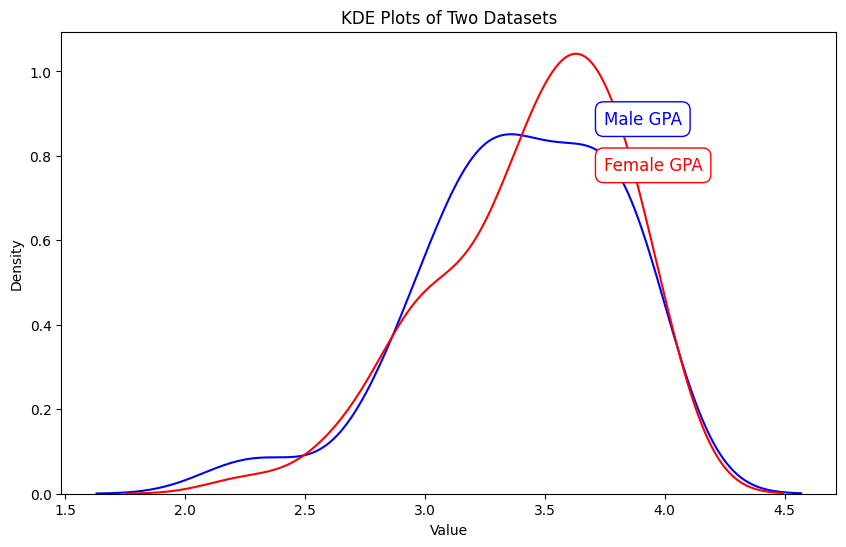

In [ ]:
two_sample_kdeplot(male_gpa, female_gpa, label1='Male GPA', label2= 'Female GPA')

In [ ]:
test_p()

Fail to reject the null hypothesis


In [ ]:
# two sample t tes between male and female students' weight
male_lbs = cleaned_df[cleaned_df['Gender'] == 'Male']['weight']
female_lbs = cleaned_df[cleaned_df['Gender'] == 'Female']['weight']

In [ ]:
_, p_value = stats.ttest_ind(male_lbs, female_lbs)
p_value

5.310812514203321e-10

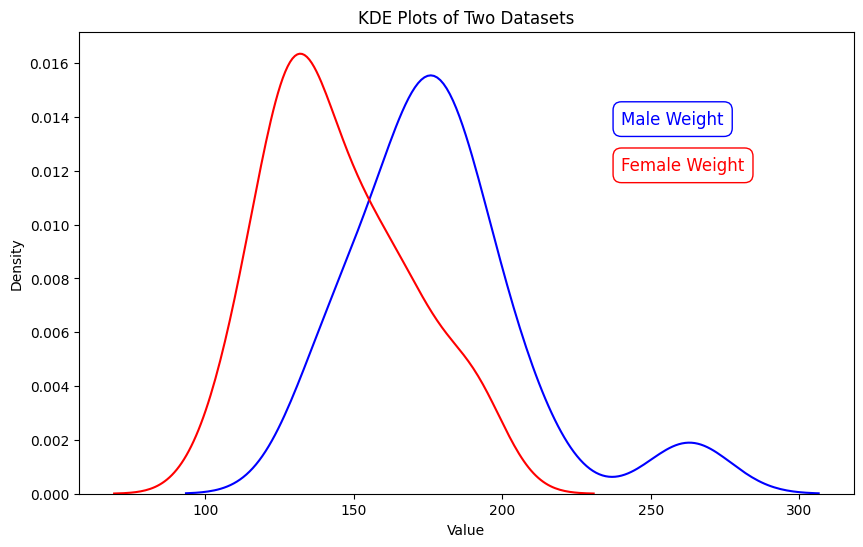

In [ ]:
two_sample_kdeplot(male_lbs, female_lbs, label1='Male Weight', label2= 'Female Weight')

In [ ]:
test_p()

Fail to reject the null hypothesis


In [ ]:
# two sample t test between athletes and non-athletes GPA
sport_gpa = cleaned_df[cleaned_df['sports'] == 'Yes']['GPA']
no_sport_gpa = cleaned_df[cleaned_df['sports'] == 'No']['GPA']

In [ ]:
_, p_value = stats.ttest_ind(sport_gpa, no_sport_gpa)
p_value

0.7837539128902224

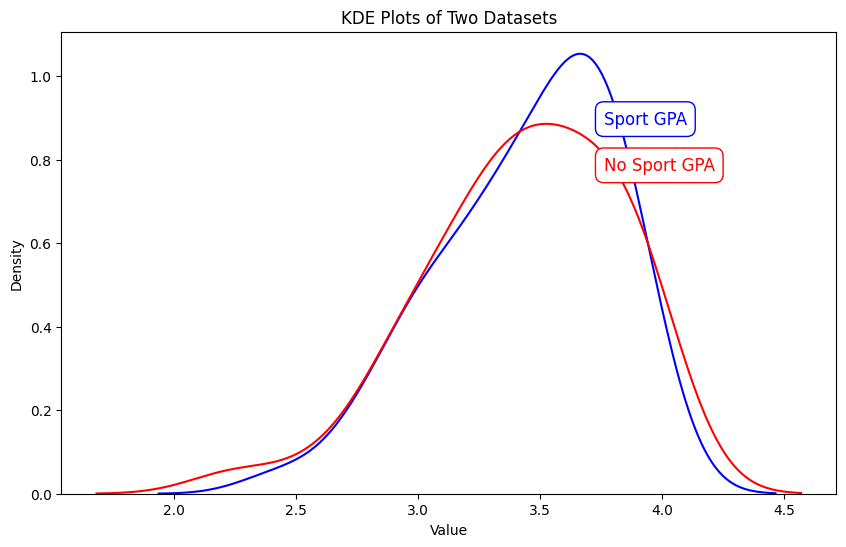

In [ ]:
two_sample_kdeplot(sport_gpa, no_sport_gpa, label1='Sport GPA', label2= 'No Sport GPA')

In [ ]:
test_p()

Fail to reject the null hypothesis


In [ ]:
#two sample t test between athletes and non-athletes Weight
sport_lbs = cleaned_df[cleaned_df['sports'] == 'Yes']['weight']
no_sport_lbs = cleaned_df[cleaned_df['sports'] == 'No']['weight']

In [ ]:
_, p_value = stats.ttest_ind(sport_lbs, no_sport_lbs)
p_value

0.03225453702274283

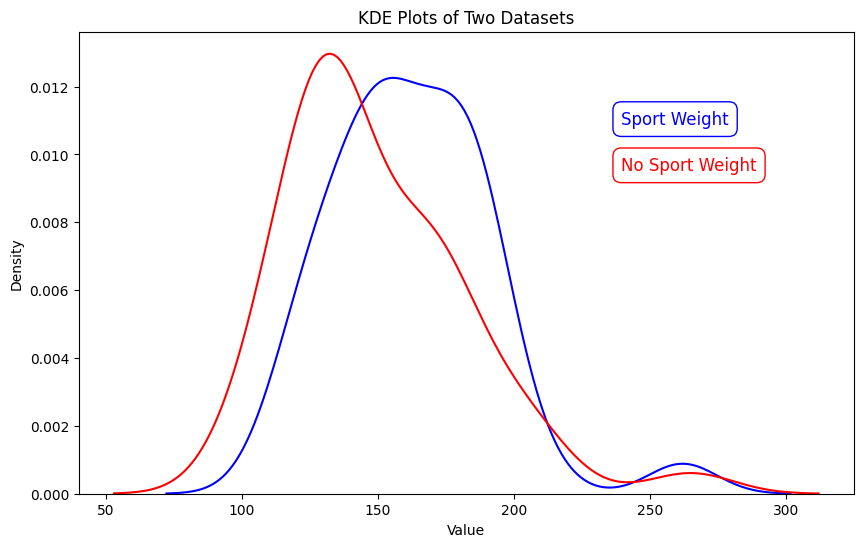

In [ ]:
two_sample_kdeplot(sport_lbs, no_sport_lbs, label1='Sport Weight', label2= 'No Sport Weight')

In [ ]:
test_p()

Fail to reject the null hypothesis


In [ ]:
# two sample t test between gpa of upper-class(JR + SR) and lower-class students (FS+SP)

In [ ]:
upper_gpa = cleaned_df[cleaned_df['grade_level'] >= 3]['GPA']
lower_gpa = cleaned_df[cleaned_df['grade_level'] <= 2]['GPA']

In [ ]:
_, p_value = stats.ttest_ind(upper_gpa, lower_gpa)
p_value

0.006883120416056022

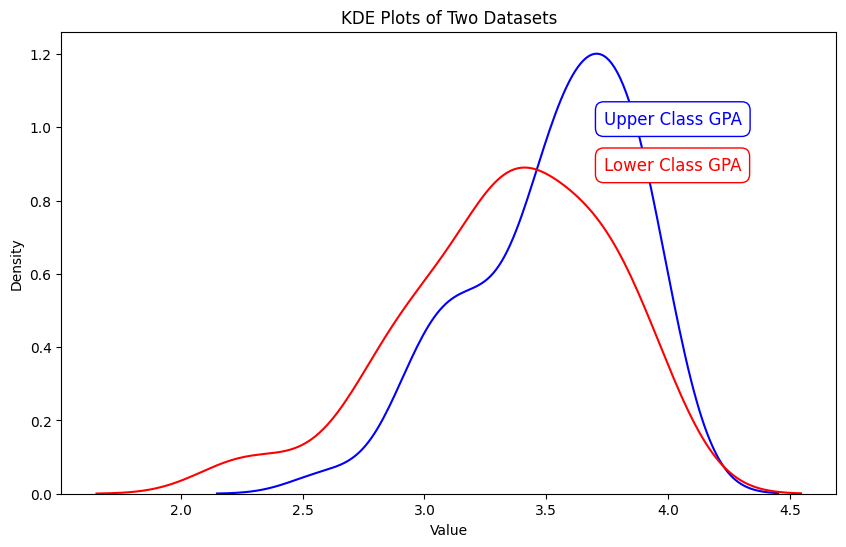

In [ ]:
two_sample_kdeplot(upper_gpa, lower_gpa, label1='Upper Class GPA', label2= 'Lower Class GPA')

In [ ]:
test_p()

Fail to reject the null hypothesis


In [ ]:
# two sample t test between weight of upper-class and lower-class students

In [ ]:
upper_lbs = cleaned_df[cleaned_df['grade_level'] >= 3]['weight']
lower_lbs = cleaned_df[cleaned_df['grade_level'] <= 2]['weight']

In [ ]:
_, p_value = stats.ttest_ind(upper_lbs, lower_lbs)
p_value

0.3052724022614776

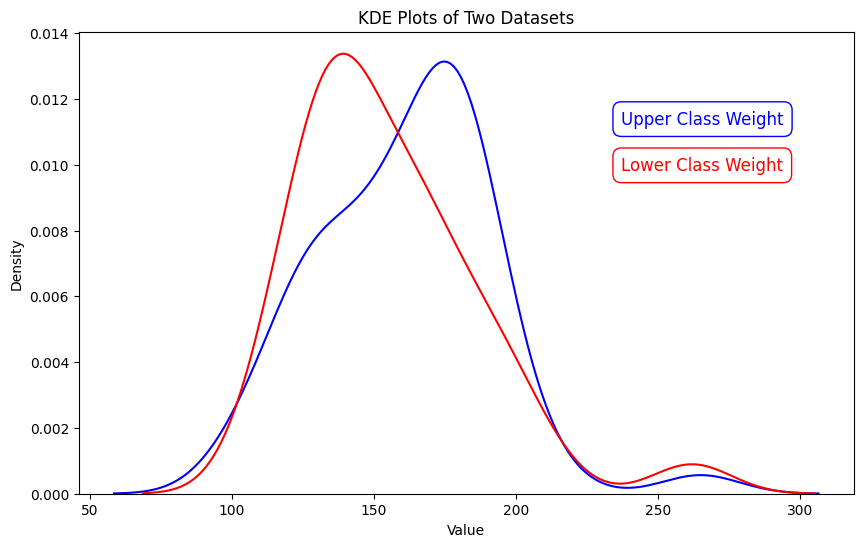

In [ ]:
two_sample_kdeplot(upper_lbs, lower_lbs, label1='Upper Class Weight', label2= 'Lower Class Weight')

In [ ]:
test_p()

Fail to reject the null hypothesis
